In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File path to the csv files
csv_file_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
csv_file_red ="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
# Read white csv file into dataframe
data_white_wine = pd.read_csv(csv_file_white, sep=";")

# set white as color
data_white_wine["color"] = "white"

# Print first 5 rows in the dataframe
data_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
# describe the data
data_white_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,NaN
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,NaN
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,NaN
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,NaN


In [5]:
# inspect the variable types
data_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
color                   4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [6]:
# Read red wine csv file into dataframe
data_red_wine  = pd.read_csv(csv_file_red, sep=";")

# set red as color
data_red_wine["color"] = "red"

# Print first 5 rows in the dataframe
data_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
# inspect the data
data_red_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1599
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN


In [8]:
# inspect the variable types
data_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
color                   1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [9]:
# merge the red and the white wine dataframes together
data_wine = data_white_wine.append(data_red_wine, ignore_index = True)

In [10]:
# set "color" as a categorical variable 
data_wine['color'] = pd.Categorical(data_wine['color'])

In [11]:
# create boolean for the wine quality: good or bad
data_wine['qual_bool'] = np.where(data_wine['quality']<=6, 0, 1).astype(bool)

In [12]:
# get descriptive statistics from the data
data_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,qual_bool
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,5220
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,NaN


In [13]:
# check the types of the variables of the dataset
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null category
qual_bool               6497 non-null bool
dtypes: bool(1), category(1), float64(11), int64(1)
memory usage: 622.0 KB


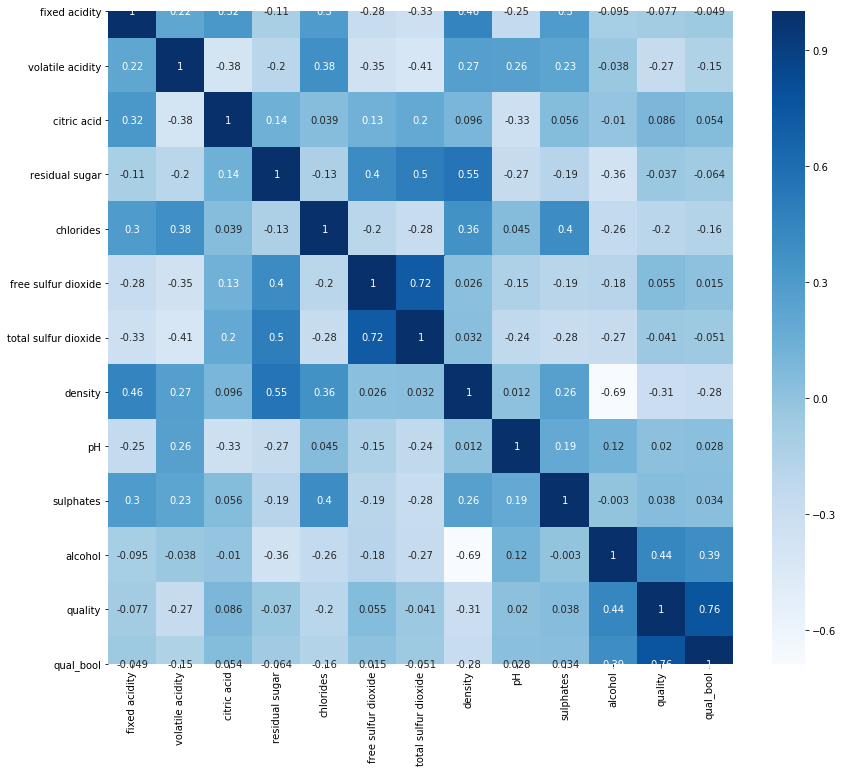

In [14]:
# check the correlation between the variables
# compute the correlation matrix
correlation_matrix = data_wine.corr()
figure = plt.figure(figsize = (14,12))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

Text(0.5, 1, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

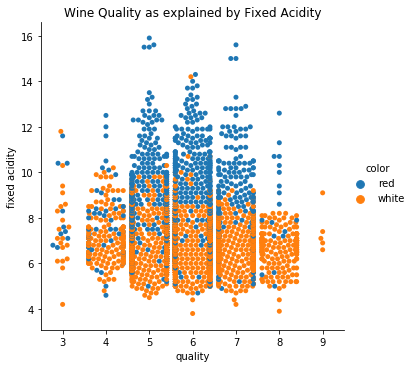

In [15]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed acidity", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Fixed Acidity")

Text(0.5, 1, 'Wine Quality as explained by Volatile Acidity')

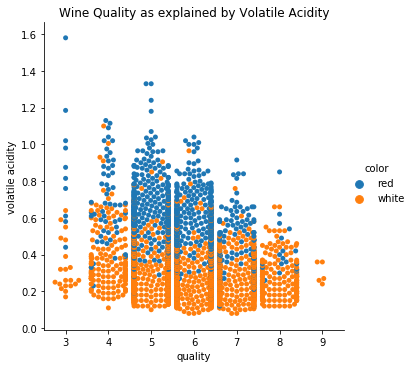

In [16]:
# inspect the relationship between quality and volatile acidity
sns.catplot(x = 'quality', y = 'volatile acidity', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Volatile Acidity")

Text(0.5, 1, 'Wine Quality as explained by Citric Acidity')

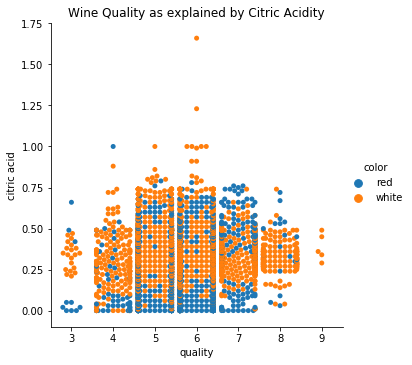

In [17]:
# inspect the relationship between quality and citric acid
sns.catplot(x="quality", y="citric acid", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Citric Acidity")

Text(0.5, 1, 'Wine Quality as explained by Residual Sugar')

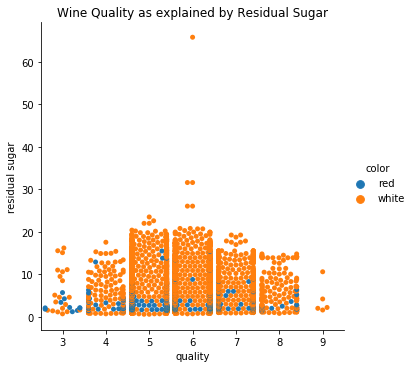

In [18]:
# inspect the relationship between quality and residual sugar
sns.catplot(x = 'quality', y = 'residual sugar', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Residual Sugar")

Text(0.5, 1, 'Wine Quality as explained by Chlorides')

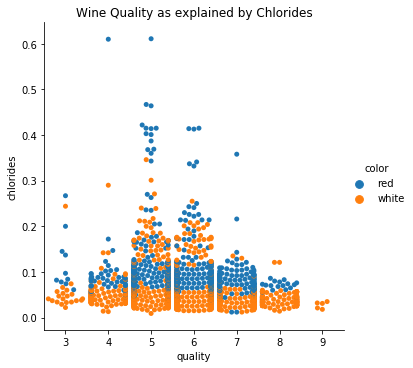

In [19]:
# inspect the relationship between quality and chlorides
sns.catplot(x = 'quality', y = 'chlorides', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Chlorides")

Text(0.5, 1, 'Wine Quality as explained by Free Sulfur Dioxide')

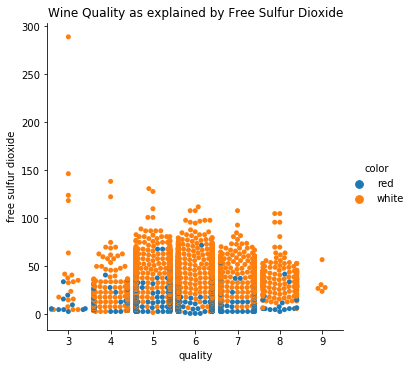

In [20]:
# inspect the relationship between quality and free sulfur dioxide
sns.catplot(x = 'quality', y = 'free sulfur dioxide', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Free Sulfur Dioxide")

Text(0.5, 1, 'Wine Quality as explained by Total Sulfur Dioxide')

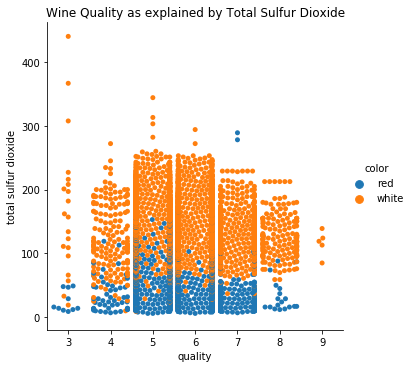

In [21]:
# inspect the relationship between quality and total sulfur dioxide
sns.catplot(x = 'quality', y = 'total sulfur dioxide', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Total Sulfur Dioxide")

Text(0.5, 1, 'Wine Quality as explained by Density')

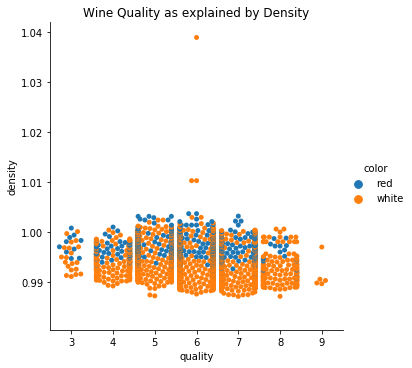

In [22]:
# inspect the relationship between quality and density
sns.catplot(x = 'quality', y = 'density', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Density")

Text(0.5, 1, 'Wine Quality as explained by pH')

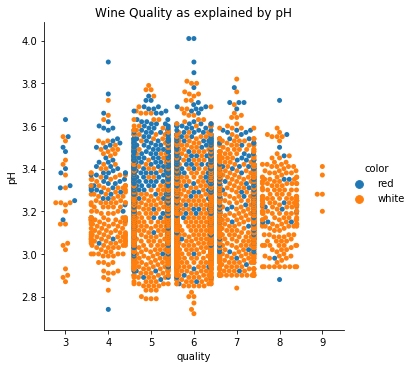

In [23]:
# inspect the relationship between quality and pH
sns.catplot(x = 'quality', y = 'pH', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by pH")

Text(0.5, 1, 'Wine Quality as explained by Sulphates')

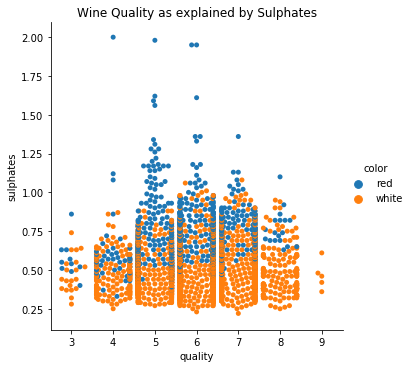

In [24]:
# inspect the relationship between quality and sulphates
sns.catplot(x = 'quality', y = 'sulphates', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Sulphates")

Text(0.5, 1, 'Wine Quality as explained by Alcohol')

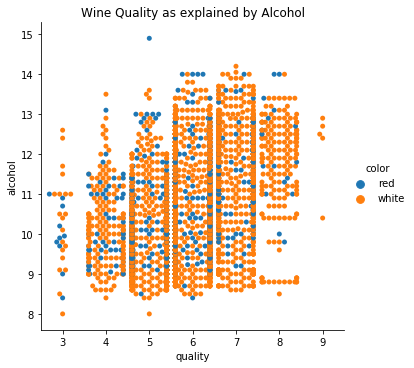

In [25]:
# inspect the relationship between quality and alcohol
sns.catplot(x = 'quality', y = 'alcohol', hue="color", kind="swarm", data = data_wine)
plt.title("Wine Quality as explained by Alcohol")

In [27]:
data_wine.to_csv('winedata.csv', index = False)